# Importar librerias

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Leer imagen

In [17]:
img = cv2.imread('omero.jpg', 0)
img2 = img.copy()

# Dimensiones de la imagen

In [18]:
(row, col) = img.shape

# Reduccion de la gama de la imagen

In [19]:
for i in range(row):
    for j in range(col):
        if (img[i][j] < 10):
            img2[i][j] = 10
        if (img[i][j] > 240):
            img2[i][j] = 240

# Normalizacion de los pixeles 

In [20]:
f_max = img2.max()
f_min = img2.min()
img3 = img2.copy()
for i in range(row):
    for j in range(col):
        img3[i][j] = ((img2[i][j] - f_min) / (f_max - f_min)) * 256

# Deteccion de bordesedge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
imagen1 = cv2.filter2D(img3,-1,edge_kernel)

In [21]:
edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
imagen1 = cv2.filter2D(img3,-1,edge_kernel)

# Creacion de Matriz de imagenes

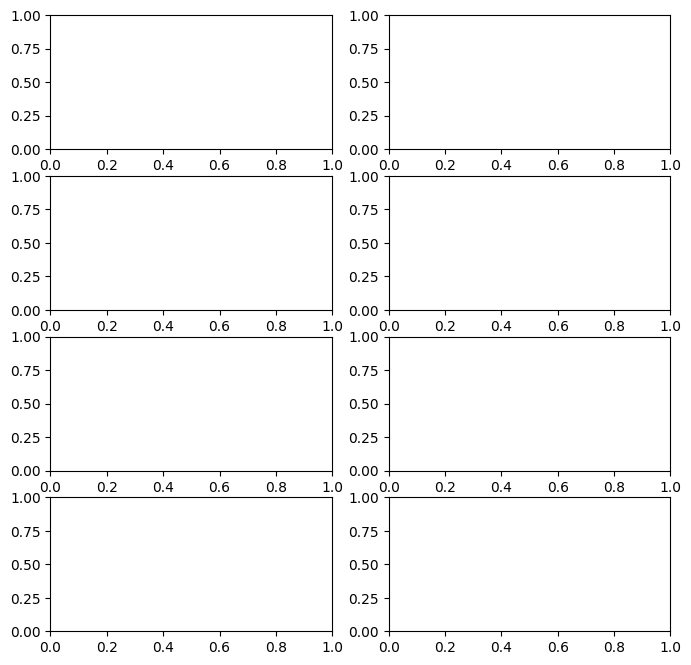

In [22]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))

# Asignacion en la matriz

In [23]:
axs[0][0].imshow(img, cmap="gray")
axs[0][0].axis("off")

axs[0][1].hist(img.ravel(), 256, [0, 256], color='gray')
axs[0][1].set_title('Histograma de la imagen original')


axs[1][0].imshow(img2, cmap="gray")
axs[1][0].axis("off")

axs[1][1].hist(img2.ravel(), 256, [0, 256], color='gray')
axs[1][1].set_title('Histograma de la imagen sin estirar')

axs[2][0].imshow(img3, cmap="gray")
axs[2][0].axis("off")

axs[2][1].hist(img3.ravel(), 256, [0, 256], color='gray')
axs[2][1].set_title('Histograma de la imagen normalizada')

axs[3][0].imshow(imagen1, cmap="gray")
axs[3][0].axis("off")

axs[3][1].hist(imagen1.ravel(), 256, [0, 256], color='gray')
axs[3][1].set_title('Deteccion de bordes')

Text(0.5, 1.0, 'Deteccion de bordes')

# Impresion de la matriz

In [24]:
plt.show()